In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1: Characteristic curve of the uniform midtread quantiser (5 points)


a) Write a function xq = my_quant(x,N) that quantises a quasi amplitude-continuous signal
x with a value range of −1 ≤ x ≤ 1 with an arbitrary, but odd number N of quantisation
steps using the midtread uniform quantiser characteristic curve. Make use of the round function and the quantisation model that was introduced in the course. Values above 1 or below −1 shall be clipped to the highest and lowest quantisation step, respectively.


In [2]:
def my_quant(x,N):
    #limit
    x = np.copy(x)
    idx = np.where(np.abs(x) >= 1)
    x[idx] = np.sign(x[idx])
    
    #quantization
    Q = 2/(N-1) #quantization Stepsize    
    xQ = Q * np.floor(x/Q + 1/2)
    return xQ

b) Test xq = my_quant(x,N) for a signal vector x = -1:0.001:1 and generate the left of fig. 1 using N = 17 quantisation steps. 

In [3]:
def plot_signal(x, XQ, titel):
    e = xQ - x
    plt.figure(figsize=(10,10))
    plt.plot(x, x, label=r'$x[k]$')
    plt.plot(x, xQ, label=r'$x_Q[k]$')
    plt.plot(x, e, label=r'$e[k] = x_Q[k] - x[k]$')
    plt.xlabel(r'input $x$')
    plt.ylabel(r'output $x_Q$')
    plt.legend()
    plt.grid()
    
    plt.title(titel)

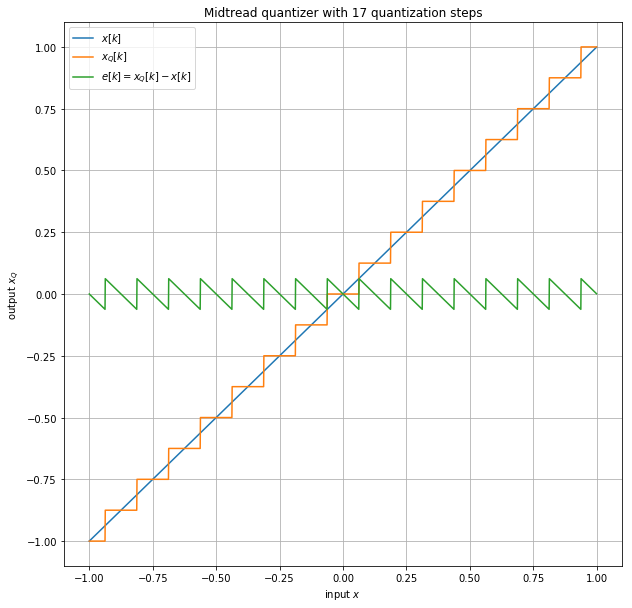

In [4]:
x = np.arange(-1, 1, 0.001)
xQ = my_quant(x, 17)

plot_signal(x,xQ, r'Midtread quantizer with 17 quantization steps')

c) Modify xq = my_quant(x,N) so that it also works for even N. To this end, the last
quantisation step for positive amplitudes is increased, cf. fig. 1 on the right. This models
typical analogue-to-digital (ADC) / digital-to-analogue (DAC) converters that use N = $2^w$ quantisation steps with number of bits w ∈ N. In video applications, typically 8 to 16
bit can be found, in audio typically 16 to 24 bit.

In [5]:
def my_quant_even(x,N):
    #limit
    x = np.copy(x)
    idx = np.where(np.abs(x) >= 1)
    x[idx] = np.sign(x[idx])
    
    
    #quantization
    Q = 2/N #quantization Stepsize
    xQ = Q * np.floor(x/Q + 1/2)
    #increase last quantisation step
    iqdx = np.where(x > (1-Q))
    xQ[iqdx] = 1-Q
    
    return xQ

d) Test the modifed xq = my_quant(x,N) for a signal vector x = -1:0.001:1 and generate
the right of fig. 1 using N = 16 quantisation steps, i.e. resolution of 4 bit.

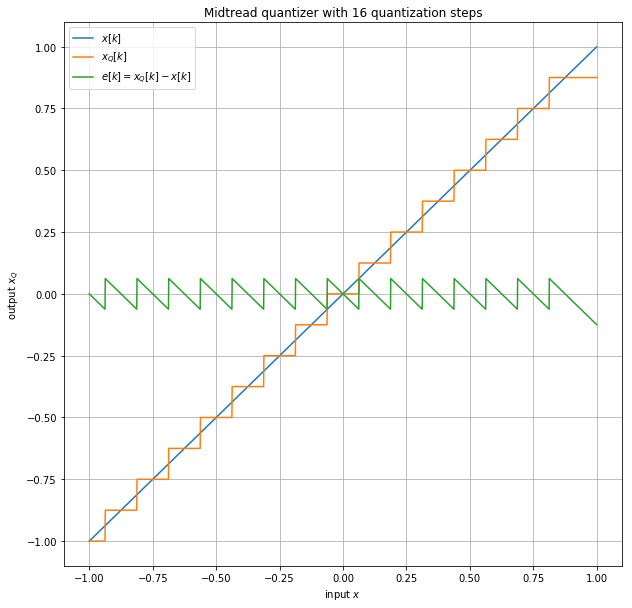

In [6]:
x = np.arange(-1, 1, 0.001)
xQ = my_quant_even(x, 16)

plot_signal(x,xQ, r'Midtread quantizer with 16 quantization steps')